In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [28]:
pd.options.display.max_columns = None
pd.options.display.max_rows = None

desc = pd.read_csv("../DATA/lending_club_info.csv")
desc.sort_values("LoanStatNew")

### A few features like zip_code and address are unusable for the model. The label is loan_status.

In [129]:
df = pd.read_csv("../DATA/lending_club_loan_two.csv")
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,Not Verified,Jan-2015,Fully Paid,vacation,Vacation,26.24,Jun-1990,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,Not Verified,Jan-2015,Fully Paid,debt_consolidation,Debt consolidation,22.05,Jul-2004,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,Source Verified,Jan-2015,Fully Paid,credit_card,Credit card refinancing,12.79,Aug-2007,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,Not Verified,Nov-2014,Fully Paid,credit_card,Credit card refinancing,2.60,Sep-2006,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,Verified,Apr-2013,Charged Off,credit_card,Credit Card Refinance,33.95,Mar-1999,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650"


### Some columns are not numbers, like term or emp_title. I will convert some of them to categorical features using dummy variables if the number of unique values is small enough.

In [8]:
df.shape

(396030, 27)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394274 non-null  object 
 15  

In [10]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
loan_amnt,396030.0,14113.888089,8357.441341,500.00,8000.00,12000.00,20000.00,40000.00
int_rate,396030.0,13.639400,4.472157,5.32,10.49,13.33,16.49,30.99
installment,396030.0,431.849698,250.727790,16.08,250.33,375.43,567.30,1533.81
annual_inc,396030.0,74203.175798,61637.621158,0.00,45000.00,64000.00,90000.00,8706582.00
dti,396030.0,17.379514,18.019092,0.00,11.28,16.91,22.98,9999.00
open_acc,396030.0,11.311153,5.137649,0.00,8.00,10.00,14.00,90.00
pub_rec,396030.0,0.178191,0.530671,0.00,0.00,0.00,0.00,86.00
revol_bal,396030.0,15844.539853,20591.836109,0.00,6025.00,11181.00,19620.00,1743266.00
revol_util,395754.0,53.791749,24.452193,0.00,35.80,54.80,72.90,892.30
total_acc,396030.0,25.414744,11.886991,2.00,17.00,24.00,32.00,151.00


In [ ]:
sns.

In [13]:
df["loan_status"].value_counts()

loan_status
Fully Paid     318357
Charged Off     77673
Name: count, dtype: int64

<Axes: xlabel='loan_status', ylabel='count'>

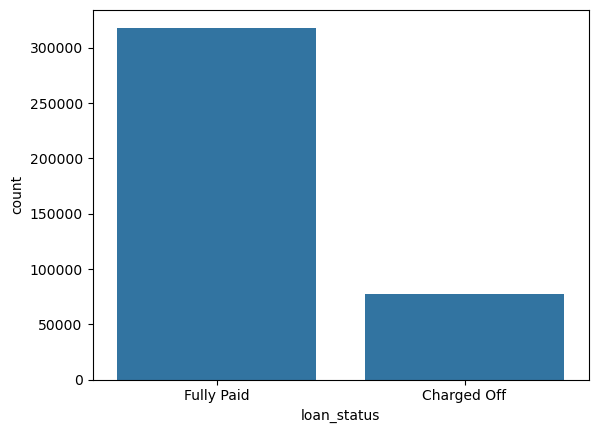

In [15]:
sns.countplot(data=df, x="loan_status")

### Most people fully paid off their loan. The two classes are unbalanced, meaning accuracy is less viable of a measure for the model. Also, I will convert the type of the classes from strings to integers 0 and 1.

In [20]:
df["term"].value_counts()

term
36 months    302005
60 months     94025
Name: count, dtype: int64

### I should convert these two into 0s and 1s.

In [18]:
df["emp_length"].value_counts()

emp_length
10+ years    126041
2 years       35827
< 1 year      31725
3 years       31665
5 years       26495
1 year        25882
4 years       23952
6 years       20841
7 years       20819
8 years       19168
9 years       15314
Name: count, dtype: int64

In [23]:
df["emp_title"].value_counts()

emp_title
Teacher                    4389
Manager                    4250
Registered Nurse           1856
RN                         1846
Supervisor                 1830
                           ... 
Postman                       1
McCarthy & Holthus, LLC       1
jp flooring                   1
Histology Technologist        1
Gracon Services, Inc          1
Name: count, Length: 173105, dtype: int64

### There are far too many different employee titles, making it practically unusable for the model, so I will drop this feature.

In [102]:
df["grade"].value_counts()

grade
B    116018
C    105987
A     64187
D     63524
E     31488
F     11772
G      3054
Name: count, dtype: int64

<Axes: xlabel='grade', ylabel='count'>

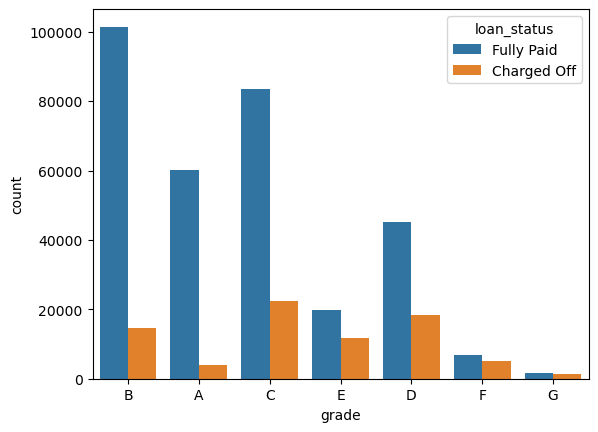

In [103]:
sns.countplot(data=df, x="grade", hue="loan_status")

In [22]:
df["sub_grade"].value_counts()

sub_grade
B3    26655
B4    25601
C1    23662
C2    22580
B2    22495
B5    22085
C3    21221
C4    20280
B1    19182
A5    18526
C5    18244
D1    15993
A4    15789
D2    13951
D3    12223
D4    11657
A3    10576
A1     9729
D5     9700
A2     9567
E1     7917
E2     7431
E3     6207
E4     5361
E5     4572
F1     3536
F2     2766
F3     2286
F4     1787
F5     1397
G1     1058
G2      754
G3      552
G4      374
G5      316
Name: count, dtype: int64

### These do not seem as important as the grades, so I will drop this feature.

In [24]:
df["home_ownership"].value_counts()

home_ownership
MORTGAGE    198348
RENT        159790
OWN          37746
OTHER          112
NONE            31
ANY              3
Name: count, dtype: int64

In [33]:
df["application_type"].value_counts()

application_type
INDIVIDUAL    395319
JOINT            425
DIRECT_PAY       286
Name: count, dtype: int64

In [34]:
df["initial_list_status"].value_counts()

initial_list_status
f    238066
w    157964
Name: count, dtype: int64

In [35]:
df["purpose"].value_counts()

purpose
debt_consolidation    234507
credit_card            83019
home_improvement       24030
other                  21185
major_purchase          8790
small_business          5701
car                     4697
medical                 4196
moving                  2854
vacation                2452
house                   2201
wedding                 1812
renewable_energy         329
educational              257
Name: count, dtype: int64

In [111]:
len(df["purpose"].value_counts())

14

In [78]:
ndf = pd.get_dummies(df["loan_status"][:100], drop_first=True)
ndf.head()

,Fully Paid
0,True
1,True
2,True
3,True
4,False


In [79]:
ndf = pd.concat([ndf, pd.get_dummies(df["purpose"][:100], drop_first=True)], axis=1)
ndf.head()

,Fully Paid,credit_card,debt_consolidation,home_improvement,house,major_purchase,medical,moving,other,small_business,vacation,wedding
0,True,False,False,False,False,False,False,False,False,False,True,False
1,True,False,True,False,False,False,False,False,False,False,False,False
2,True,True,False,False,False,False,False,False,False,False,False,False
3,True,True,False,False,False,False,False,False,False,False,False,False
4,False,True,False,False,False,False,False,False,False,False,False,False


In [65]:
ndf.corr()["Fully Paid"]

Fully Paid            1.000000
credit_card           0.060680
debt_consolidation   -0.031903
home_improvement      0.060012
house                 0.042220
major_purchase        0.042220
medical              -0.090294
moving               -0.239247
other                 0.073877
small_business        0.073877
vacation              0.060012
wedding              -0.239247
Name: Fully Paid, dtype: float64

<Axes: >

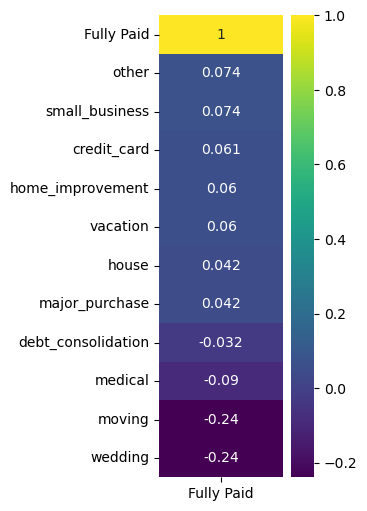

In [77]:
plt.figure(figsize=(2,6))
sns.heatmap(pd.DataFrame(ndf.corr()["Fully Paid"]).sort_values("Fully Paid", ascending=False), annot=True, cmap="viridis")

### Not enough correlation to justify adding 14 new features, so I will drop the purpose column.

In [89]:
desc.iloc[18, 1]

"The month the borrower's earliest reported credit line was opened"

In [90]:
desc.iloc[11, 1]

'The month which the loan was funded'

In [91]:
df["earliest_cr_line"] = pd.to_datetime(df["earliest_cr_line"])
df["issue_d"] = pd.to_datetime(df["issue_d"])
df.head()

/var/folders/8v/jv_ccv7x6bb679_h5m_hgz0h0000gn/T/ipykernel_36302/563373816.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["issue_d"] = pd.to_datetime(df["issue_d"])


,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,Not Verified,2015-01-01,Fully Paid,vacation,Vacation,26.24,1990-06-01,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,Not Verified,2015-01-01,Fully Paid,debt_consolidation,Debt consolidation,22.05,2004-07-01,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,Source Verified,2015-01-01,Fully Paid,credit_card,Credit card refinancing,12.79,2007-08-01,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,Not Verified,2014-11-01,Fully Paid,credit_card,Credit card refinancing,2.60,2006-09-01,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,Verified,2013-04-01,Charged Off,credit_card,Credit Card Refinance,33.95,1999-03-01,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650"


In [93]:
ndf2 = pd.get_dummies(df["loan_status"][:100], drop_first=True)
ndf2["cr_year"] = df["earliest_cr_line"][:100].apply(lambda x: x.year)
ndf2["cr_month"] = df["earliest_cr_line"][:100].apply(lambda x: x.month)
ndf2["issue_year"] = df["issue_d"][:100].apply(lambda x: x.year)
ndf2["issue_month"] = df["issue_d"][:100].apply(lambda x: x.month)

ndf2.head()

,Fully Paid,cr_year,cr_month,issue_year,issue_month
0,True,1990,6,2015,1
1,True,2004,7,2015,1
2,True,2007,8,2015,1
3,True,2006,9,2014,11
4,False,1999,3,2013,4


In [94]:
ndf2.corr()

,Fully Paid,cr_year,cr_month,issue_year,issue_month
Fully Paid,1.000000,-0.124483,0.110845,0.108472,0.013529
cr_year,-0.124483,1.000000,0.083873,0.145450,0.060139
cr_month,0.110845,0.083873,1.000000,-0.148086,0.095073
issue_year,0.108472,0.145450,-0.148086,1.000000,-0.152766
issue_month,0.013529,0.060139,0.095073,-0.152766,1.000000


### Not storng enough correlation for any of these two features.

<Axes: xlabel='term', ylabel='count'>

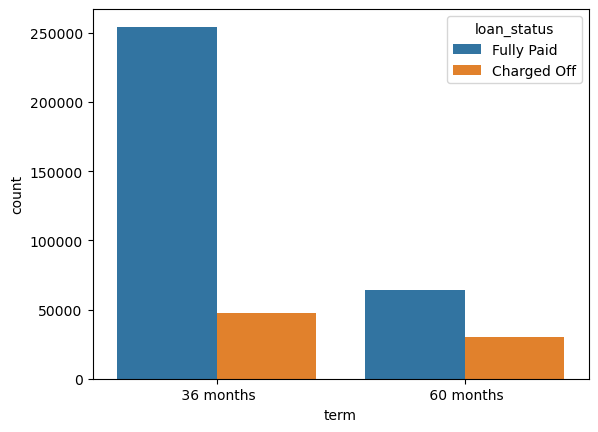

In [96]:
sns.countplot(data=df, x="term", hue="loan_status")

### More percentage of people who took 60 months loan did not fully pay it back than people who took 36 months loan.

In [99]:
df["verification_status"].value_counts()

verification_status
Verified           139563
Source Verified    131385
Not Verified       125082
Name: count, dtype: int64

<Axes: xlabel='verification_status', ylabel='count'>

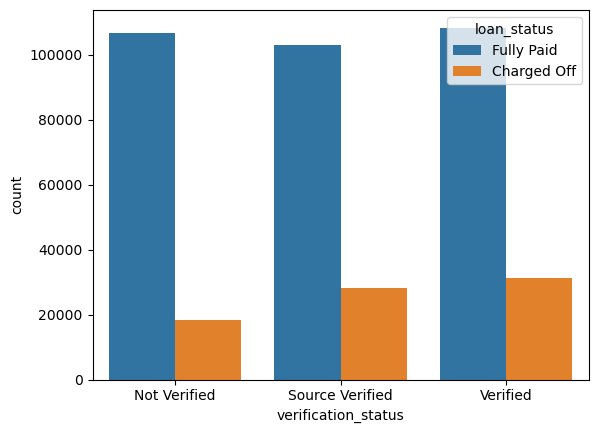

In [104]:
sns.countplot(data=df, x="verification_status", hue="loan_status")

### Interesting how the more verified a person was, the more likely it was for them no be charged off (slightly).

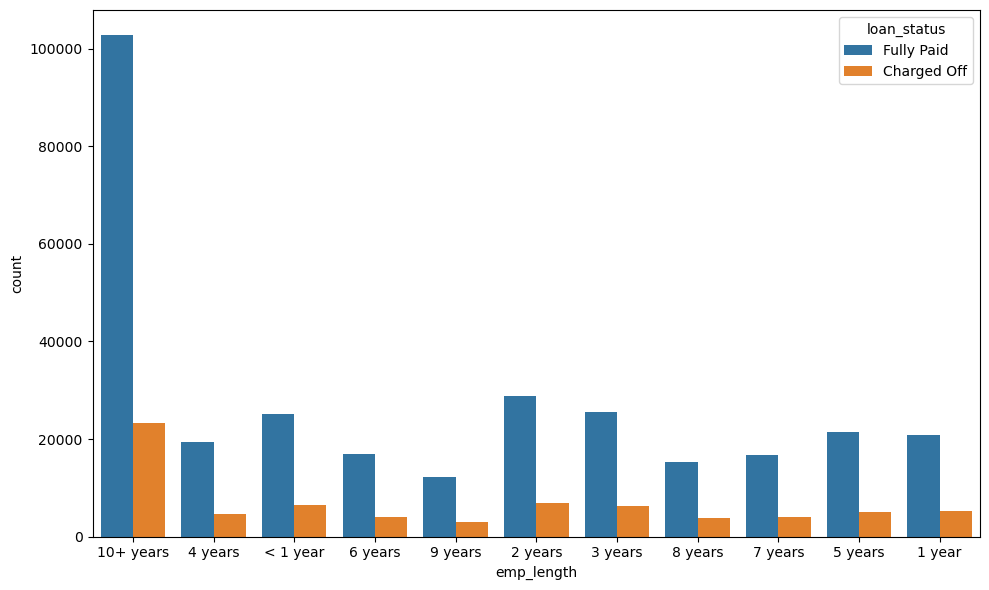

In [108]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x="emp_length", hue="loan_status")
plt.tight_layout()

### Similar distribution for each length, and there are a lot of classes anyway, so I will drop this column.

In [132]:
df["title"].nunique()

48816

In [134]:
df["application_type"].value_counts()

application_type
INDIVIDUAL    395319
JOINT            425
DIRECT_PAY       286
Name: count, dtype: int64

### Far too many titles to split into categorical columns. It will be dropped.

In [133]:
df.drop(["sub_grade", "emp_title", "issue_d", "purpose", "earliest_cr_line", "title", "emp_length", "address"], axis=1, inplace=True)
df.head()

,loan_amnt,term,int_rate,installment,grade,home_ownership,annual_inc,verification_status,loan_status,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies
0,10000.0,36 months,11.44,329.48,B,RENT,117000.0,Not Verified,Fully Paid,26.24,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0
1,8000.0,36 months,11.99,265.68,B,MORTGAGE,65000.0,Not Verified,Fully Paid,22.05,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0
2,15600.0,36 months,10.49,506.97,B,RENT,43057.0,Source Verified,Fully Paid,12.79,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0
3,7200.0,36 months,6.49,220.65,A,RENT,54000.0,Not Verified,Fully Paid,2.60,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0
4,24375.0,60 months,17.27,609.33,C,MORTGAGE,55000.0,Verified,Charged Off,33.95,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0


In [125]:
col_to_cat = ["term", "grade", "home_ownership", "verification_status", "initial_list_status", "application_type"]
df = pd.concat([df, pd.get_dummies(df["term"], drop_first=True)], axis=1)
df.drop("term", axis=1, inplace=True)
df.head()

,loan_amnt,int_rate,installment,grade,home_ownership,annual_inc,verification_status,loan_status,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,60 months
0,10000.0,11.44,329.48,B,RENT,117000.0,Not Verified,Fully Paid,26.24,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,False
1,8000.0,11.99,265.68,B,MORTGAGE,65000.0,Not Verified,Fully Paid,22.05,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,False
2,15600.0,10.49,506.97,B,RENT,43057.0,Source Verified,Fully Paid,12.79,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,False
3,7200.0,6.49,220.65,A,RENT,54000.0,Not Verified,Fully Paid,2.60,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,False
4,24375.0,17.27,609.33,C,MORTGAGE,55000.0,Verified,Charged Off,33.95,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,True


In [119]:
df = pd.concat([df, pd.get_dummies(df["term"], drop_first=True)], axis=1)
df.drop("term", axis=1, inplace=True)

,loan_amnt,term,int_rate,installment,grade,home_ownership,annual_inc,verification_status,loan_status,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies
0,10000.0,36 months,11.44,329.48,B,RENT,117000.0,Not Verified,Fully Paid,26.24,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0
1,8000.0,36 months,11.99,265.68,B,MORTGAGE,65000.0,Not Verified,Fully Paid,22.05,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0
2,15600.0,36 months,10.49,506.97,B,RENT,43057.0,Source Verified,Fully Paid,12.79,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0
3,7200.0,36 months,6.49,220.65,A,RENT,54000.0,Not Verified,Fully Paid,2.60,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0
4,24375.0,60 months,17.27,609.33,C,MORTGAGE,55000.0,Verified,Charged Off,33.95,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0
